# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt


%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%reload_ext autoreload
%autoreload 2

## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [2]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'

    # Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
    try:
       del X_train, y_train
       del X_test, y_test
       print('Clear previously loaded data.')
    except:
       pass

    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for your own interest.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [3]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

In [37]:
###### Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM


learning_rates = [2e-8, 2.5e-8, 3e-8, 3.5e-8, 4e-8, 2.5e-7, 3e-7, 3.5e-7, 4e-7]
regularization_strengths = [2.5e4, 3e4, 3.5e4, 4e4, 2.5e5, 3e5, 3.5e5, 4e5, 2.5e6, 3e6, 3.5e6, 4e6]


results = {}
best_val = -1
best_svm = None

################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

pass

for rate in learning_rates:
    for reg_now in regularization_strengths:
        svm = LinearSVM()
        loss_hist = svm.train(X_train_feats, y_train, learning_rate=rate, reg=reg_now, 
                              num_iters=6000, verbose=True)
        y_train_pred = svm.predict(X_train_feats)
        training_accuracy = np.mean(y_train == y_train_pred)
        y_val_pred = svm.predict(X_val_feats)
        validation_accuracy = np.mean(y_val == y_val_pred)
        results[(rate, reg_now)] = (training_accuracy, validation_accuracy)
        if validation_accuracy > best_val:
            best_val = validation_accuracy
            best_svm = svm

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

iteration 0 / 6000: loss 51.630231
iteration 100 / 6000: loss 47.548557
iteration 200 / 6000: loss 43.891936
iteration 300 / 6000: loss 40.569620
iteration 400 / 6000: loss 37.555600
iteration 500 / 6000: loss 34.846766
iteration 600 / 6000: loss 32.382616
iteration 700 / 6000: loss 30.153628
iteration 800 / 6000: loss 28.132895
iteration 900 / 6000: loss 26.311257
iteration 1000 / 6000: loss 24.676004
iteration 1100 / 6000: loss 23.172409
iteration 1200 / 6000: loss 21.820416
iteration 1300 / 6000: loss 20.608272
iteration 1400 / 6000: loss 19.501497
iteration 1500 / 6000: loss 18.498295
iteration 1600 / 6000: loss 17.595181
iteration 1700 / 6000: loss 16.778163
iteration 1800 / 6000: loss 16.045954
iteration 1900 / 6000: loss 15.367684
iteration 2000 / 6000: loss 14.760963
iteration 2100 / 6000: loss 14.215325
iteration 2200 / 6000: loss 13.716168
iteration 2300 / 6000: loss 13.262995
iteration 2400 / 6000: loss 12.860432
iteration 2500 / 6000: loss 12.490483
iteration 2600 / 6000: l

iteration 4200 / 6000: loss 9.073102
iteration 4300 / 6000: loss 9.062507
iteration 4400 / 6000: loss 9.052877
iteration 4500 / 6000: loss 9.045716
iteration 4600 / 6000: loss 9.038908
iteration 4700 / 6000: loss 9.033071
iteration 4800 / 6000: loss 9.028141
iteration 4900 / 6000: loss 9.023751
iteration 5000 / 6000: loss 9.020262
iteration 5100 / 6000: loss 9.017767
iteration 5200 / 6000: loss 9.015019
iteration 5300 / 6000: loss 9.012686
iteration 5400 / 6000: loss 9.010648
iteration 5500 / 6000: loss 9.008900
iteration 5600 / 6000: loss 9.007671
iteration 5700 / 6000: loss 9.006737
iteration 5800 / 6000: loss 9.005905
iteration 5900 / 6000: loss 9.004804
iteration 0 / 6000: loss 380.949169
iteration 100 / 6000: loss 145.488770
iteration 200 / 6000: loss 59.094911
iteration 300 / 6000: loss 27.377847
iteration 400 / 6000: loss 15.745106
iteration 500 / 6000: loss 11.474124
iteration 600 / 6000: loss 9.908527
iteration 700 / 6000: loss 9.333950
iteration 800 / 6000: loss 9.122499
iter

iteration 2400 / 6000: loss 9.000020
iteration 2500 / 6000: loss 8.999997
iteration 2600 / 6000: loss 8.999994
iteration 2700 / 6000: loss 8.999992
iteration 2800 / 6000: loss 9.000006
iteration 2900 / 6000: loss 9.000003
iteration 3000 / 6000: loss 9.000004
iteration 3100 / 6000: loss 8.999984
iteration 3200 / 6000: loss 8.999986
iteration 3300 / 6000: loss 8.999996
iteration 3400 / 6000: loss 9.000011
iteration 3500 / 6000: loss 8.999995
iteration 3600 / 6000: loss 8.999989
iteration 3700 / 6000: loss 8.999974
iteration 3800 / 6000: loss 8.999991
iteration 3900 / 6000: loss 9.000004
iteration 4000 / 6000: loss 8.999999
iteration 4100 / 6000: loss 9.000005
iteration 4200 / 6000: loss 9.000016
iteration 4300 / 6000: loss 9.000001
iteration 4400 / 6000: loss 9.000010
iteration 4500 / 6000: loss 9.000014
iteration 4600 / 6000: loss 9.000003
iteration 4700 / 6000: loss 9.000017
iteration 4800 / 6000: loss 9.000011
iteration 4900 / 6000: loss 9.000016
iteration 5000 / 6000: loss 8.999991
i

iteration 700 / 6000: loss 8.999999
iteration 800 / 6000: loss 9.000000
iteration 900 / 6000: loss 9.000002
iteration 1000 / 6000: loss 9.000003
iteration 1100 / 6000: loss 9.000001
iteration 1200 / 6000: loss 9.000000
iteration 1300 / 6000: loss 9.000002
iteration 1400 / 6000: loss 9.000000
iteration 1500 / 6000: loss 9.000000
iteration 1600 / 6000: loss 9.000000
iteration 1700 / 6000: loss 9.000001
iteration 1800 / 6000: loss 8.999998
iteration 1900 / 6000: loss 8.999999
iteration 2000 / 6000: loss 8.999999
iteration 2100 / 6000: loss 9.000000
iteration 2200 / 6000: loss 9.000000
iteration 2300 / 6000: loss 9.000002
iteration 2400 / 6000: loss 9.000001
iteration 2500 / 6000: loss 9.000002
iteration 2600 / 6000: loss 9.000000
iteration 2700 / 6000: loss 9.000001
iteration 2800 / 6000: loss 9.000001
iteration 2900 / 6000: loss 9.000001
iteration 3000 / 6000: loss 9.000000
iteration 3100 / 6000: loss 9.000002
iteration 3200 / 6000: loss 9.000000
iteration 3300 / 6000: loss 9.000002
iter

iteration 4800 / 6000: loss 9.012517
iteration 4900 / 6000: loss 9.010602
iteration 5000 / 6000: loss 9.008795
iteration 5100 / 6000: loss 9.007361
iteration 5200 / 6000: loss 9.006101
iteration 5300 / 6000: loss 9.005107
iteration 5400 / 6000: loss 9.004384
iteration 5500 / 6000: loss 9.003800
iteration 5600 / 6000: loss 9.003256
iteration 5700 / 6000: loss 9.002490
iteration 5800 / 6000: loss 9.002270
iteration 5900 / 6000: loss 9.001806
iteration 0 / 6000: loss 67.308114
iteration 100 / 6000: loss 56.737555
iteration 200 / 6000: loss 48.080600
iteration 300 / 6000: loss 40.997104
iteration 400 / 6000: loss 35.192618
iteration 500 / 6000: loss 30.437152
iteration 600 / 6000: loss 26.558665
iteration 700 / 6000: loss 23.367241
iteration 800 / 6000: loss 20.768058
iteration 900 / 6000: loss 18.626464
iteration 1000 / 6000: loss 16.880986
iteration 1100 / 6000: loss 15.451960
iteration 1200 / 6000: loss 14.285342
iteration 1300 / 6000: loss 13.321735
iteration 1400 / 6000: loss 12.53958

iteration 3200 / 6000: loss 8.999994
iteration 3300 / 6000: loss 9.000003
iteration 3400 / 6000: loss 8.999999
iteration 3500 / 6000: loss 9.000036
iteration 3600 / 6000: loss 9.000014
iteration 3700 / 6000: loss 9.000005
iteration 3800 / 6000: loss 8.999988
iteration 3900 / 6000: loss 8.999963
iteration 4000 / 6000: loss 9.000006
iteration 4100 / 6000: loss 8.999968
iteration 4200 / 6000: loss 8.999997
iteration 4300 / 6000: loss 9.000003
iteration 4400 / 6000: loss 9.000000
iteration 4500 / 6000: loss 9.000019
iteration 4600 / 6000: loss 9.000000
iteration 4700 / 6000: loss 8.999997
iteration 4800 / 6000: loss 9.000023
iteration 4900 / 6000: loss 9.000003
iteration 5000 / 6000: loss 9.000006
iteration 5100 / 6000: loss 8.999980
iteration 5200 / 6000: loss 8.999996
iteration 5300 / 6000: loss 8.999997
iteration 5400 / 6000: loss 9.000002
iteration 5500 / 6000: loss 9.000005
iteration 5600 / 6000: loss 9.000003
iteration 5700 / 6000: loss 9.000002
iteration 5800 / 6000: loss 9.000001
i

iteration 1500 / 6000: loss 9.000001
iteration 1600 / 6000: loss 9.000003
iteration 1700 / 6000: loss 9.000001
iteration 1800 / 6000: loss 9.000000
iteration 1900 / 6000: loss 9.000001
iteration 2000 / 6000: loss 9.000001
iteration 2100 / 6000: loss 8.999999
iteration 2200 / 6000: loss 8.999998
iteration 2300 / 6000: loss 8.999999
iteration 2400 / 6000: loss 9.000001
iteration 2500 / 6000: loss 9.000000
iteration 2600 / 6000: loss 9.000000
iteration 2700 / 6000: loss 9.000002
iteration 2800 / 6000: loss 8.999999
iteration 2900 / 6000: loss 9.000001
iteration 3000 / 6000: loss 9.000001
iteration 3100 / 6000: loss 9.000003
iteration 3200 / 6000: loss 9.000001
iteration 3300 / 6000: loss 9.000001
iteration 3400 / 6000: loss 9.000001
iteration 3500 / 6000: loss 9.000002
iteration 3600 / 6000: loss 9.000001
iteration 3700 / 6000: loss 9.000001
iteration 3800 / 6000: loss 9.000000
iteration 3900 / 6000: loss 9.000002
iteration 4000 / 6000: loss 9.000000
iteration 4100 / 6000: loss 9.000000
i

iteration 5900 / 6000: loss 9.001082
iteration 0 / 6000: loss 61.161771
iteration 100 / 6000: loss 51.272343
iteration 200 / 6000: loss 43.258241
iteration 300 / 6000: loss 36.761910
iteration 400 / 6000: loss 31.505424
iteration 500 / 6000: loss 27.242960
iteration 600 / 6000: loss 23.784333
iteration 700 / 6000: loss 20.981423
iteration 800 / 6000: loss 18.718320
iteration 900 / 6000: loss 16.875890
iteration 1000 / 6000: loss 15.380300
iteration 1100 / 6000: loss 14.176240
iteration 1200 / 6000: loss 13.191647
iteration 1300 / 6000: loss 12.400930
iteration 1400 / 6000: loss 11.753904
iteration 1500 / 6000: loss 11.236642
iteration 1600 / 6000: loss 10.806315
iteration 1700 / 6000: loss 10.466817
iteration 1800 / 6000: loss 10.189186
iteration 1900 / 6000: loss 9.963581
iteration 2000 / 6000: loss 9.779681
iteration 2100 / 6000: loss 9.632340
iteration 2200 / 6000: loss 9.513425
iteration 2300 / 6000: loss 9.417286
iteration 2400 / 6000: loss 9.336963
iteration 2500 / 6000: loss 9.2

iteration 4200 / 6000: loss 8.999998
iteration 4300 / 6000: loss 8.999989
iteration 4400 / 6000: loss 9.000004
iteration 4500 / 6000: loss 8.999986
iteration 4600 / 6000: loss 8.999999
iteration 4700 / 6000: loss 9.000009
iteration 4800 / 6000: loss 9.000020
iteration 4900 / 6000: loss 9.000003
iteration 5000 / 6000: loss 9.000027
iteration 5100 / 6000: loss 8.999965
iteration 5200 / 6000: loss 9.000015
iteration 5300 / 6000: loss 9.000007
iteration 5400 / 6000: loss 9.000026
iteration 5500 / 6000: loss 8.999996
iteration 5600 / 6000: loss 8.999997
iteration 5700 / 6000: loss 8.999973
iteration 5800 / 6000: loss 8.999975
iteration 5900 / 6000: loss 8.999994
iteration 0 / 6000: loss 555.358508
iteration 100 / 6000: loss 75.164633
iteration 200 / 6000: loss 17.013819
iteration 300 / 6000: loss 9.970705
iteration 400 / 6000: loss 9.117823
iteration 500 / 6000: loss 9.014340
iteration 600 / 6000: loss 9.001757
iteration 700 / 6000: loss 9.000214
iteration 800 / 6000: loss 9.000023
iteratio

iteration 2600 / 6000: loss 9.000000
iteration 2700 / 6000: loss 9.000000
iteration 2800 / 6000: loss 9.000002
iteration 2900 / 6000: loss 9.000002
iteration 3000 / 6000: loss 9.000002
iteration 3100 / 6000: loss 9.000000
iteration 3200 / 6000: loss 9.000004
iteration 3300 / 6000: loss 9.000000
iteration 3400 / 6000: loss 8.999999
iteration 3500 / 6000: loss 8.999999
iteration 3600 / 6000: loss 9.000001
iteration 3700 / 6000: loss 8.999999
iteration 3800 / 6000: loss 9.000003
iteration 3900 / 6000: loss 9.000005
iteration 4000 / 6000: loss 9.000004
iteration 4100 / 6000: loss 9.000001
iteration 4200 / 6000: loss 9.000001
iteration 4300 / 6000: loss 8.999997
iteration 4400 / 6000: loss 9.000002
iteration 4500 / 6000: loss 9.000002
iteration 4600 / 6000: loss 9.000003
iteration 4700 / 6000: loss 9.000004
iteration 4800 / 6000: loss 9.000002
iteration 4900 / 6000: loss 8.999999
iteration 5000 / 6000: loss 9.000002
iteration 5100 / 6000: loss 9.000001
iteration 5200 / 6000: loss 9.000002
i

iteration 800 / 6000: loss 17.661355
iteration 900 / 6000: loss 16.018201
iteration 1000 / 6000: loss 14.688929
iteration 1100 / 6000: loss 13.610953
iteration 1200 / 6000: loss 12.737034
iteration 1300 / 6000: loss 12.027850
iteration 1400 / 6000: loss 11.456287
iteration 1500 / 6000: loss 10.989557
iteration 1600 / 6000: loss 10.612880
iteration 1700 / 6000: loss 10.309633
iteration 1800 / 6000: loss 10.059867
iteration 1900 / 6000: loss 9.857152
iteration 2000 / 6000: loss 9.696484
iteration 2100 / 6000: loss 9.564644
iteration 2200 / 6000: loss 9.457612
iteration 2300 / 6000: loss 9.370976
iteration 2400 / 6000: loss 9.300459
iteration 2500 / 6000: loss 9.244215
iteration 2600 / 6000: loss 9.197750
iteration 2700 / 6000: loss 9.159698
iteration 2800 / 6000: loss 9.129142
iteration 2900 / 6000: loss 9.105647
iteration 3000 / 6000: loss 9.085663
iteration 3100 / 6000: loss 9.068790
iteration 3200 / 6000: loss 9.056338
iteration 3300 / 6000: loss 9.045530
iteration 3400 / 6000: loss 9

iteration 5100 / 6000: loss 8.999969
iteration 5200 / 6000: loss 9.000017
iteration 5300 / 6000: loss 8.999993
iteration 5400 / 6000: loss 9.000015
iteration 5500 / 6000: loss 8.999992
iteration 5600 / 6000: loss 8.999967
iteration 5700 / 6000: loss 9.000009
iteration 5800 / 6000: loss 9.000005
iteration 5900 / 6000: loss 8.999973
iteration 0 / 6000: loss 457.604944
iteration 100 / 6000: loss 63.336150
iteration 200 / 6000: loss 15.580759
iteration 300 / 6000: loss 9.796920
iteration 400 / 6000: loss 9.096547
iteration 500 / 6000: loss 9.011681
iteration 600 / 6000: loss 9.001439
iteration 700 / 6000: loss 9.000162
iteration 800 / 6000: loss 9.000018
iteration 900 / 6000: loss 8.999989
iteration 1000 / 6000: loss 9.000010
iteration 1100 / 6000: loss 8.999966
iteration 1200 / 6000: loss 9.000009
iteration 1300 / 6000: loss 8.999993
iteration 1400 / 6000: loss 9.000009
iteration 1500 / 6000: loss 9.000007
iteration 1600 / 6000: loss 8.999998
iteration 1700 / 6000: loss 8.999985
iteration

iteration 3400 / 6000: loss 9.000001
iteration 3500 / 6000: loss 9.000000
iteration 3600 / 6000: loss 8.999998
iteration 3700 / 6000: loss 9.000004
iteration 3800 / 6000: loss 9.000000
iteration 3900 / 6000: loss 9.000001
iteration 4000 / 6000: loss 8.999999
iteration 4100 / 6000: loss 9.000000
iteration 4200 / 6000: loss 9.000002
iteration 4300 / 6000: loss 9.000001
iteration 4400 / 6000: loss 8.999999
iteration 4500 / 6000: loss 9.000003
iteration 4600 / 6000: loss 9.000005
iteration 4700 / 6000: loss 8.999995
iteration 4800 / 6000: loss 9.000000
iteration 4900 / 6000: loss 9.000001
iteration 5000 / 6000: loss 8.999998
iteration 5100 / 6000: loss 9.000000
iteration 5200 / 6000: loss 9.000001
iteration 5300 / 6000: loss 9.000001
iteration 5400 / 6000: loss 9.000004
iteration 5500 / 6000: loss 9.000005
iteration 5600 / 6000: loss 9.000004
iteration 5700 / 6000: loss 9.000003
iteration 5800 / 6000: loss 8.999998
iteration 5900 / 6000: loss 9.000005
iteration 0 / 6000: loss 4732.434968
i

iteration 1800 / 6000: loss 10.058997
iteration 1900 / 6000: loss 9.865538
iteration 2000 / 6000: loss 9.708703
iteration 2100 / 6000: loss 9.578915
iteration 2200 / 6000: loss 9.476808
iteration 2300 / 6000: loss 9.390513
iteration 2400 / 6000: loss 9.319744
iteration 2500 / 6000: loss 9.260485
iteration 2600 / 6000: loss 9.212970
iteration 2700 / 6000: loss 9.173925
iteration 2800 / 6000: loss 9.143105
iteration 2900 / 6000: loss 9.116487
iteration 3000 / 6000: loss 9.095099
iteration 3100 / 6000: loss 9.077925
iteration 3200 / 6000: loss 9.063605
iteration 3300 / 6000: loss 9.052150
iteration 3400 / 6000: loss 9.042603
iteration 3500 / 6000: loss 9.034758
iteration 3600 / 6000: loss 9.028701
iteration 3700 / 6000: loss 9.022979
iteration 3800 / 6000: loss 9.019409
iteration 3900 / 6000: loss 9.015725
iteration 4000 / 6000: loss 9.012993
iteration 4100 / 6000: loss 9.010278
iteration 4200 / 6000: loss 9.008509
iteration 4300 / 6000: loss 9.006547
iteration 4400 / 6000: loss 9.005746


iteration 100 / 6000: loss 58.667813
iteration 200 / 6000: loss 15.654301
iteration 300 / 6000: loss 9.891095
iteration 400 / 6000: loss 9.119228
iteration 500 / 6000: loss 9.016082
iteration 600 / 6000: loss 9.002163
iteration 700 / 6000: loss 9.000314
iteration 800 / 6000: loss 9.000021
iteration 900 / 6000: loss 9.000003
iteration 1000 / 6000: loss 8.999975
iteration 1100 / 6000: loss 9.000032
iteration 1200 / 6000: loss 9.000001
iteration 1300 / 6000: loss 9.000022
iteration 1400 / 6000: loss 8.999996
iteration 1500 / 6000: loss 9.000035
iteration 1600 / 6000: loss 9.000014
iteration 1700 / 6000: loss 9.000013
iteration 1800 / 6000: loss 8.999976
iteration 1900 / 6000: loss 8.999995
iteration 2000 / 6000: loss 9.000008
iteration 2100 / 6000: loss 9.000022
iteration 2200 / 6000: loss 9.000045
iteration 2300 / 6000: loss 9.000036
iteration 2400 / 6000: loss 9.000013
iteration 2500 / 6000: loss 9.000028
iteration 2600 / 6000: loss 9.000013
iteration 2700 / 6000: loss 8.999982
iteratio

iteration 4500 / 6000: loss 8.999990
iteration 4600 / 6000: loss 9.000002
iteration 4700 / 6000: loss 8.999978
iteration 4800 / 6000: loss 8.999993
iteration 4900 / 6000: loss 8.999997
iteration 5000 / 6000: loss 9.000004
iteration 5100 / 6000: loss 9.000031
iteration 5200 / 6000: loss 9.000004
iteration 5300 / 6000: loss 9.000008
iteration 5400 / 6000: loss 8.999996
iteration 5500 / 6000: loss 9.000008
iteration 5600 / 6000: loss 8.999983
iteration 5700 / 6000: loss 9.000003
iteration 5800 / 6000: loss 9.000004
iteration 5900 / 6000: loss 9.000000
iteration 0 / 6000: loss 3909.550706
iteration 100 / 6000: loss 9.000002
iteration 200 / 6000: loss 9.000002
iteration 300 / 6000: loss 9.000005
iteration 400 / 6000: loss 8.999997
iteration 500 / 6000: loss 9.000000
iteration 600 / 6000: loss 9.000003
iteration 700 / 6000: loss 9.000004
iteration 800 / 6000: loss 9.000000
iteration 900 / 6000: loss 9.000004
iteration 1000 / 6000: loss 9.000005
iteration 1100 / 6000: loss 9.000003
iteration 

iteration 2800 / 6000: loss 9.000003
iteration 2900 / 6000: loss 9.000000
iteration 3000 / 6000: loss 9.000002
iteration 3100 / 6000: loss 9.000000
iteration 3200 / 6000: loss 9.000002
iteration 3300 / 6000: loss 9.000001
iteration 3400 / 6000: loss 9.000002
iteration 3500 / 6000: loss 9.000000
iteration 3600 / 6000: loss 9.000002
iteration 3700 / 6000: loss 9.000000
iteration 3800 / 6000: loss 9.000002
iteration 3900 / 6000: loss 9.000000
iteration 4000 / 6000: loss 9.000000
iteration 4100 / 6000: loss 9.000001
iteration 4200 / 6000: loss 9.000001
iteration 4300 / 6000: loss 9.000000
iteration 4400 / 6000: loss 9.000002
iteration 4500 / 6000: loss 9.000001
iteration 4600 / 6000: loss 8.999999
iteration 4700 / 6000: loss 9.000003
iteration 4800 / 6000: loss 9.000001
iteration 4900 / 6000: loss 9.000002
iteration 5000 / 6000: loss 9.000004
iteration 5100 / 6000: loss 9.000000
iteration 5200 / 6000: loss 9.000003
iteration 5300 / 6000: loss 9.000003
iteration 5400 / 6000: loss 9.000005
i

iteration 1200 / 6000: loss 9.000073
iteration 1300 / 6000: loss 9.000053
iteration 1400 / 6000: loss 8.999968
iteration 1500 / 6000: loss 9.000067
iteration 1600 / 6000: loss 9.000066
iteration 1700 / 6000: loss 9.000076
iteration 1800 / 6000: loss 9.000050
iteration 1900 / 6000: loss 9.000030
iteration 2000 / 6000: loss 9.000030
iteration 2100 / 6000: loss 9.000079
iteration 2200 / 6000: loss 8.999922
iteration 2300 / 6000: loss 9.000005
iteration 2400 / 6000: loss 9.000011
iteration 2500 / 6000: loss 9.000153
iteration 2600 / 6000: loss 9.000248
iteration 2700 / 6000: loss 9.000051
iteration 2800 / 6000: loss 8.999920
iteration 2900 / 6000: loss 9.000000
iteration 3000 / 6000: loss 9.000086
iteration 3100 / 6000: loss 8.999961
iteration 3200 / 6000: loss 9.000039
iteration 3300 / 6000: loss 8.999786
iteration 3400 / 6000: loss 9.000267
iteration 3500 / 6000: loss 8.999846
iteration 3600 / 6000: loss 8.999930
iteration 3700 / 6000: loss 8.999909
iteration 3800 / 6000: loss 8.999973
i

iteration 5500 / 6000: loss 8.999992
iteration 5600 / 6000: loss 9.000001
iteration 5700 / 6000: loss 9.000020
iteration 5800 / 6000: loss 9.000016
iteration 5900 / 6000: loss 8.999975
iteration 0 / 6000: loss 618.797357
iteration 100 / 6000: loss 9.000013
iteration 200 / 6000: loss 9.000014
iteration 300 / 6000: loss 9.000012
iteration 400 / 6000: loss 9.000014
iteration 500 / 6000: loss 9.000028
iteration 600 / 6000: loss 8.999997
iteration 700 / 6000: loss 9.000013
iteration 800 / 6000: loss 9.000014
iteration 900 / 6000: loss 9.000009
iteration 1000 / 6000: loss 9.000002
iteration 1100 / 6000: loss 8.999989
iteration 1200 / 6000: loss 9.000009
iteration 1300 / 6000: loss 9.000027
iteration 1400 / 6000: loss 9.000027
iteration 1500 / 6000: loss 9.000007
iteration 1600 / 6000: loss 9.000021
iteration 1700 / 6000: loss 8.999998
iteration 1800 / 6000: loss 9.000008
iteration 1900 / 6000: loss 9.000016
iteration 2000 / 6000: loss 9.000018
iteration 2100 / 6000: loss 9.000014
iteration 2

iteration 3900 / 6000: loss 9.000011
iteration 4000 / 6000: loss 9.000016
iteration 4100 / 6000: loss 9.000016
iteration 4200 / 6000: loss 9.000015
iteration 4300 / 6000: loss 9.000019
iteration 4400 / 6000: loss 9.000012
iteration 4500 / 6000: loss 9.000019
iteration 4600 / 6000: loss 9.000010
iteration 4700 / 6000: loss 9.000017
iteration 4800 / 6000: loss 9.000017
iteration 4900 / 6000: loss 9.000018
iteration 5000 / 6000: loss 9.000014
iteration 5100 / 6000: loss 9.000011
iteration 5200 / 6000: loss 9.000016
iteration 5300 / 6000: loss 9.000017
iteration 5400 / 6000: loss 9.000015
iteration 5500 / 6000: loss 9.000019
iteration 5600 / 6000: loss 9.000015
iteration 5700 / 6000: loss 9.000019
iteration 5800 / 6000: loss 9.000014
iteration 5900 / 6000: loss 9.000011
iteration 0 / 6000: loss 6087.734591
iteration 100 / 6000: loss 9.000015
iteration 200 / 6000: loss 9.000021
iteration 300 / 6000: loss 9.000015
iteration 400 / 6000: loss 9.000015
iteration 500 / 6000: loss 9.000017
iterat

iteration 2400 / 6000: loss 9.000049
iteration 2500 / 6000: loss 8.999638
iteration 2600 / 6000: loss 8.999884
iteration 2700 / 6000: loss 9.000053
iteration 2800 / 6000: loss 9.000156
iteration 2900 / 6000: loss 9.000090
iteration 3000 / 6000: loss 9.000123
iteration 3100 / 6000: loss 9.000123
iteration 3200 / 6000: loss 8.999924
iteration 3300 / 6000: loss 9.000089
iteration 3400 / 6000: loss 8.999921
iteration 3500 / 6000: loss 9.000181
iteration 3600 / 6000: loss 9.000161
iteration 3700 / 6000: loss 9.000008
iteration 3800 / 6000: loss 8.999890
iteration 3900 / 6000: loss 8.999828
iteration 4000 / 6000: loss 8.999770
iteration 4100 / 6000: loss 9.000156
iteration 4200 / 6000: loss 9.000339
iteration 4300 / 6000: loss 9.000037
iteration 4400 / 6000: loss 9.000026
iteration 4500 / 6000: loss 9.000141
iteration 4600 / 6000: loss 8.999954
iteration 4700 / 6000: loss 9.000002
iteration 4800 / 6000: loss 9.000324
iteration 4900 / 6000: loss 9.000101
iteration 5000 / 6000: loss 8.999962
i

iteration 800 / 6000: loss 8.999997
iteration 900 / 6000: loss 8.999996
iteration 1000 / 6000: loss 8.999990
iteration 1100 / 6000: loss 9.000023
iteration 1200 / 6000: loss 8.999994
iteration 1300 / 6000: loss 9.000015
iteration 1400 / 6000: loss 9.000024
iteration 1500 / 6000: loss 9.000001
iteration 1600 / 6000: loss 9.000032
iteration 1700 / 6000: loss 9.000028
iteration 1800 / 6000: loss 9.000026
iteration 1900 / 6000: loss 9.000005
iteration 2000 / 6000: loss 9.000014
iteration 2100 / 6000: loss 9.000003
iteration 2200 / 6000: loss 9.000001
iteration 2300 / 6000: loss 8.999989
iteration 2400 / 6000: loss 9.000015
iteration 2500 / 6000: loss 8.999992
iteration 2600 / 6000: loss 9.000020
iteration 2700 / 6000: loss 9.000043
iteration 2800 / 6000: loss 9.000008
iteration 2900 / 6000: loss 9.000006
iteration 3000 / 6000: loss 9.000016
iteration 3100 / 6000: loss 8.999984
iteration 3200 / 6000: loss 9.000028
iteration 3300 / 6000: loss 9.000028
iteration 3400 / 6000: loss 9.000021
ite

iteration 5100 / 6000: loss 9.000017
iteration 5200 / 6000: loss 9.000020
iteration 5300 / 6000: loss 9.000019
iteration 5400 / 6000: loss 9.000022
iteration 5500 / 6000: loss 9.000016
iteration 5600 / 6000: loss 9.000017
iteration 5700 / 6000: loss 9.000016
iteration 5800 / 6000: loss 9.000017
iteration 5900 / 6000: loss 9.000017
iteration 0 / 6000: loss 5556.590633
iteration 100 / 6000: loss 9.000024
iteration 200 / 6000: loss 9.000021
iteration 300 / 6000: loss 9.000023
iteration 400 / 6000: loss 9.000018
iteration 500 / 6000: loss 9.000028
iteration 600 / 6000: loss 9.000025
iteration 700 / 6000: loss 9.000027
iteration 800 / 6000: loss 9.000021
iteration 900 / 6000: loss 9.000024
iteration 1000 / 6000: loss 9.000023
iteration 1100 / 6000: loss 9.000021
iteration 1200 / 6000: loss 9.000015
iteration 1300 / 6000: loss 9.000024
iteration 1400 / 6000: loss 9.000024
iteration 1500 / 6000: loss 9.000025
iteration 1600 / 6000: loss 9.000019
iteration 1700 / 6000: loss 9.000021
iteration 

iteration 3600 / 6000: loss 9.000212
iteration 3700 / 6000: loss 9.000233
iteration 3800 / 6000: loss 9.000207
iteration 3900 / 6000: loss 9.000042
iteration 4000 / 6000: loss 8.999996
iteration 4100 / 6000: loss 8.999934
iteration 4200 / 6000: loss 9.000042
iteration 4300 / 6000: loss 8.999884
iteration 4400 / 6000: loss 9.000021
iteration 4500 / 6000: loss 8.999973
iteration 4600 / 6000: loss 9.000006
iteration 4700 / 6000: loss 8.999916
iteration 4800 / 6000: loss 9.000078
iteration 4900 / 6000: loss 9.000003
iteration 5000 / 6000: loss 8.999902
iteration 5100 / 6000: loss 9.000255
iteration 5200 / 6000: loss 9.000090
iteration 5300 / 6000: loss 9.000122
iteration 5400 / 6000: loss 9.000044
iteration 5500 / 6000: loss 9.000073
iteration 5600 / 6000: loss 9.000042
iteration 5700 / 6000: loss 9.000147
iteration 5800 / 6000: loss 9.000066
iteration 5900 / 6000: loss 9.000169
iteration 0 / 6000: loss 63.646617
iteration 100 / 6000: loss 13.650144
iteration 200 / 6000: loss 9.394915
iter

iteration 2000 / 6000: loss 9.000013
iteration 2100 / 6000: loss 9.000027
iteration 2200 / 6000: loss 9.000021
iteration 2300 / 6000: loss 9.000024
iteration 2400 / 6000: loss 8.999993
iteration 2500 / 6000: loss 9.000025
iteration 2600 / 6000: loss 9.000016
iteration 2700 / 6000: loss 9.000020
iteration 2800 / 6000: loss 9.000031
iteration 2900 / 6000: loss 9.000002
iteration 3000 / 6000: loss 8.999989
iteration 3100 / 6000: loss 9.000021
iteration 3200 / 6000: loss 9.000027
iteration 3300 / 6000: loss 9.000029
iteration 3400 / 6000: loss 9.000012
iteration 3500 / 6000: loss 9.000019
iteration 3600 / 6000: loss 9.000025
iteration 3700 / 6000: loss 9.000019
iteration 3800 / 6000: loss 9.000025
iteration 3900 / 6000: loss 8.999985
iteration 4000 / 6000: loss 9.000035
iteration 4100 / 6000: loss 8.999993
iteration 4200 / 6000: loss 9.000023
iteration 4300 / 6000: loss 9.000036
iteration 4400 / 6000: loss 9.000007
iteration 4500 / 6000: loss 9.000022
iteration 4600 / 6000: loss 9.000007
i

iteration 400 / 6000: loss 9.000028
iteration 500 / 6000: loss 9.000023
iteration 600 / 6000: loss 9.000028
iteration 700 / 6000: loss 9.000025
iteration 800 / 6000: loss 9.000026
iteration 900 / 6000: loss 9.000023
iteration 1000 / 6000: loss 9.000026
iteration 1100 / 6000: loss 9.000028
iteration 1200 / 6000: loss 9.000025
iteration 1300 / 6000: loss 9.000025
iteration 1400 / 6000: loss 9.000024
iteration 1500 / 6000: loss 9.000024
iteration 1600 / 6000: loss 9.000025
iteration 1700 / 6000: loss 9.000026
iteration 1800 / 6000: loss 9.000025
iteration 1900 / 6000: loss 9.000018
iteration 2000 / 6000: loss 9.000026
iteration 2100 / 6000: loss 9.000025
iteration 2200 / 6000: loss 9.000018
iteration 2300 / 6000: loss 9.000029
iteration 2400 / 6000: loss 9.000023
iteration 2500 / 6000: loss 9.000026
iteration 2600 / 6000: loss 9.000024
iteration 2700 / 6000: loss 9.000021
iteration 2800 / 6000: loss 9.000029
iteration 2900 / 6000: loss 9.000028
iteration 3000 / 6000: loss 9.000025
iterati

iteration 4700 / 6000: loss 8.999982
iteration 4800 / 6000: loss 9.000049
iteration 4900 / 6000: loss 9.000393
iteration 5000 / 6000: loss 9.000031
iteration 5100 / 6000: loss 8.999553
iteration 5200 / 6000: loss 8.999916
iteration 5300 / 6000: loss 8.999910
iteration 5400 / 6000: loss 9.000034
iteration 5500 / 6000: loss 8.999988
iteration 5600 / 6000: loss 8.999908
iteration 5700 / 6000: loss 8.999884
iteration 5800 / 6000: loss 9.000061
iteration 5900 / 6000: loss 9.000037
iteration 0 / 6000: loss 54.664487
iteration 100 / 6000: loss 13.083147
iteration 200 / 6000: loss 9.362587
iteration 300 / 6000: loss 9.032011
iteration 400 / 6000: loss 9.002823
iteration 500 / 6000: loss 9.000196
iteration 600 / 6000: loss 9.000190
iteration 700 / 6000: loss 8.999423
iteration 800 / 6000: loss 8.999861
iteration 900 / 6000: loss 8.999867
iteration 1000 / 6000: loss 9.000042
iteration 1100 / 6000: loss 8.999998
iteration 1200 / 6000: loss 9.000032
iteration 1300 / 6000: loss 8.999962
iteration 1

iteration 3200 / 6000: loss 8.999997
iteration 3300 / 6000: loss 8.999986
iteration 3400 / 6000: loss 8.999984
iteration 3500 / 6000: loss 9.000016
iteration 3600 / 6000: loss 8.999996
iteration 3700 / 6000: loss 9.000009
iteration 3800 / 6000: loss 9.000041
iteration 3900 / 6000: loss 9.000048
iteration 4000 / 6000: loss 8.999981
iteration 4100 / 6000: loss 9.000053
iteration 4200 / 6000: loss 9.000001
iteration 4300 / 6000: loss 9.000004
iteration 4400 / 6000: loss 9.000018
iteration 4500 / 6000: loss 9.000017
iteration 4600 / 6000: loss 8.999967
iteration 4700 / 6000: loss 9.000007
iteration 4800 / 6000: loss 9.000030
iteration 4900 / 6000: loss 8.999981
iteration 5000 / 6000: loss 9.000044
iteration 5100 / 6000: loss 9.000011
iteration 5200 / 6000: loss 9.000031
iteration 5300 / 6000: loss 8.999971
iteration 5400 / 6000: loss 8.999995
iteration 5500 / 6000: loss 9.000019
iteration 5600 / 6000: loss 9.000037
iteration 5700 / 6000: loss 9.000011
iteration 5800 / 6000: loss 9.000021
i

iteration 1600 / 6000: loss 9.000022
iteration 1700 / 6000: loss 9.000033
iteration 1800 / 6000: loss 9.000019
iteration 1900 / 6000: loss 9.000031
iteration 2000 / 6000: loss 9.000030
iteration 2100 / 6000: loss 9.000027
iteration 2200 / 6000: loss 9.000027
iteration 2300 / 6000: loss 9.000034
iteration 2400 / 6000: loss 9.000026
iteration 2500 / 6000: loss 9.000030
iteration 2600 / 6000: loss 9.000031
iteration 2700 / 6000: loss 9.000020
iteration 2800 / 6000: loss 9.000033
iteration 2900 / 6000: loss 9.000031
iteration 3000 / 6000: loss 9.000035
iteration 3100 / 6000: loss 9.000033
iteration 3200 / 6000: loss 9.000024
iteration 3300 / 6000: loss 9.000025
iteration 3400 / 6000: loss 9.000028
iteration 3500 / 6000: loss 9.000026
iteration 3600 / 6000: loss 9.000035
iteration 3700 / 6000: loss 9.000028
iteration 3800 / 6000: loss 9.000024
iteration 3900 / 6000: loss 9.000025
iteration 4000 / 6000: loss 9.000028
iteration 4100 / 6000: loss 9.000024
iteration 4200 / 6000: loss 9.000027
i

lr 2.000000e-08 reg 2.500000e+04 train accuracy: 0.156122 val accuracy: 0.159000
lr 2.000000e-08 reg 3.000000e+04 train accuracy: 0.241816 val accuracy: 0.245000
lr 2.000000e-08 reg 3.500000e+04 train accuracy: 0.271918 val accuracy: 0.294000
lr 2.000000e-08 reg 4.000000e+04 train accuracy: 0.330408 val accuracy: 0.309000
lr 2.000000e-08 reg 2.500000e+05 train accuracy: 0.413388 val accuracy: 0.405000
lr 2.000000e-08 reg 3.000000e+05 train accuracy: 0.412612 val accuracy: 0.413000
lr 2.000000e-08 reg 3.500000e+05 train accuracy: 0.415673 val accuracy: 0.415000
lr 2.000000e-08 reg 4.000000e+05 train accuracy: 0.413204 val accuracy: 0.421000
lr 2.000000e-08 reg 2.500000e+06 train accuracy: 0.407673 val accuracy: 0.410000
lr 2.000000e-08 reg 3.000000e+06 train accuracy: 0.412694 val accuracy: 0.441000
lr 2.000000e-08 reg 3.500000e+06 train accuracy: 0.410571 val accuracy: 0.390000
lr 2.000000e-08 reg 4.000000e+06 train accuracy: 0.402531 val accuracy: 0.396000
lr 2.500000e-08 reg 2.500000

In [38]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print(test_accuracy)

0.424


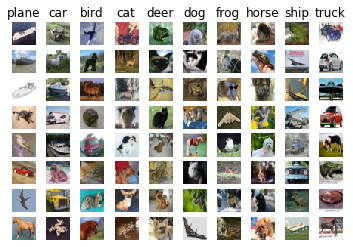

In [39]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?


$\color{blue}{\textit Your Answer:}$
Observing these misclassifications, we may feel that these classifications are somewhat outrageous, but a closer look reveals that they have a lot of similarities in color and shape to the correct classification.


## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [4]:
# Preprocessing: Remove the bias dimension
# Make sure to run this cell only ONCE
print(X_train_feats.shape)
X_train_feats = X_train_feats[:, :-1]
X_val_feats = X_val_feats[:, :-1]
X_test_feats = X_test_feats[:, :-1]

print(X_train_feats.shape)

(49000, 155)
(49000, 154)


In [20]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = 150
num_classes = 10

net = TwoLayerNet(input_dim, hidden_dim, num_classes)
best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

pass

best_val = -1
results = {}
best_net = None

learning_rates = [1e-2, 5e-2, 1e-1, 5e-1, 7.5e-1, 1]
regularization_strengths = np.array([1e-3, 1.5e-3, 5e-3, 1e-2, 5e-2, 1e-1])*2


for rate in learning_rates:
    for reg_now in regularization_strengths:
        net = TwoLayerNet(input_dim, hidden_dim, num_classes)
        stats = net.train(X_train_feats, y_train, X_val_feats, y_val, num_iters=1500, batch_size=200, 
                          learning_rate=rate, learning_rate_decay=0.95, reg=reg_now, verbose=False)
        y_val_pred = net.predict(X_val_feats)
        validation_accuracy = np.mean(y_val == y_val_pred)
        results[(rate, reg_now)] = validation_accuracy
        if validation_accuracy > best_val:
            best_val = validation_accuracy
            best_net = net
        
    
# Print out results.
for lr, reg in sorted(results):
    val_acc = results[(lr, reg)]
    print('lr %e reg %e val accuracy: %f' % (
                lr, reg, val_acc))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)


# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

lr 1.000000e-02 reg 2.000000e-03 val accuracy: 0.230000
lr 1.000000e-02 reg 3.000000e-03 val accuracy: 0.152000
lr 1.000000e-02 reg 1.000000e-02 val accuracy: 0.097000
lr 1.000000e-02 reg 2.000000e-02 val accuracy: 0.088000
lr 1.000000e-02 reg 1.000000e-01 val accuracy: 0.085000
lr 1.000000e-02 reg 2.000000e-01 val accuracy: 0.102000
lr 5.000000e-02 reg 2.000000e-03 val accuracy: 0.482000
lr 5.000000e-02 reg 3.000000e-03 val accuracy: 0.478000
lr 5.000000e-02 reg 1.000000e-02 val accuracy: 0.476000
lr 5.000000e-02 reg 2.000000e-02 val accuracy: 0.459000
lr 5.000000e-02 reg 1.000000e-01 val accuracy: 0.351000
lr 5.000000e-02 reg 2.000000e-01 val accuracy: 0.274000
lr 1.000000e-01 reg 2.000000e-03 val accuracy: 0.520000
lr 1.000000e-01 reg 3.000000e-03 val accuracy: 0.516000
lr 1.000000e-01 reg 1.000000e-02 val accuracy: 0.516000
lr 1.000000e-01 reg 2.000000e-02 val accuracy: 0.509000
lr 1.000000e-01 reg 1.000000e-01 val accuracy: 0.429000
lr 1.000000e-01 reg 2.000000e-01 val accuracy: 0

In [21]:
# Run your best neural net classifier on the test set. You should be able
# to get more than 55% accuracy.

test_acc = (best_net.predict(X_test_feats) == y_test).mean()
print(test_acc)

0.553
